In [ ]:
#On February 14, 2023, the data was imported from the paper of
#Little et al. (2009) from the webpage:
#https://archive.ics.uci.edu/ml/datasets/parkinsons

#import_data_modules
import pandas as pd
import requests
import io

#read_github_raw_data
url = 'https://raw.githubusercontent.com/ATripathiOG/ParkinsonDeepLearningExperimentation/main/parkinsons.csv'
download = requests.get(url).content
pksn_data = pd.read_csv(io.StringIO(download.decode('utf-8')))
print(pksn_data.shape)
print(pksn_data.columns)
pksn_data

(195, 24)
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
#The following two sections (drop_name_column and split_data_into_two)
#were retrieved on February 18, 2023, from
#https://www.kaggle.com/code/ryanholbrook/stochastic-gradient-descent
#by Alexis Cook and Ryan Holbrook
#(adaptation of their code).

#drop_name_column
data = pksn_data.drop(['name'], axis=1)

#split_data_into_two
df_train = data.sample(frac=0.7, random_state=0)
df_valid = data.drop(df_train.index)

max = df_train.max(axis=0)
min = df_train.min(axis=0)
df_train = (df_train - min) / (max - min)
df_valid = (df_valid - min) / (max - min)

train_X = df_train.drop('status', axis=1)
val_X = df_valid.drop('status', axis=1)
train_y = df_train['status']
val_y = df_valid['status']

In [ ]:
#import_deep_learning_modules
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

#early_stopping_to_prevent_overfitting
early_stopping = EarlyStopping(
    min_delta = 0.00001,
    patience=20,
    restore_best_weights = True)

#deep_learning_model
model = keras.Sequential([
    layers.Dense(units=10000, activation = 'relu', input_shape = [22]),
    layers.Dropout(rate = 0.2),
    layers.Dense(units=1000, activation = 'relu'),
    layers.Dropout(rate = 0.2),
    layers.Dense(units=100, activation = 'relu'),
    layers.Dense(units=10, activation = 'relu'),
    layers.Dense(units=1, activation = 'sigmoid')])

#optimizer_and_loss_function
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'])

#fit_model_to_data
history = model.fit(
    train_X, train_y,
    validation_data = (val_X, val_y),
    batch_size = 50,
    callbacks = [early_stopping],
    epochs = 1000,
    verbose=0)

Best Validation Loss: 0.1196
Best Validation Accuracy: 0.9661


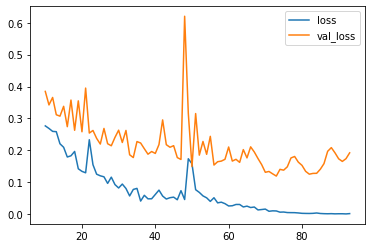

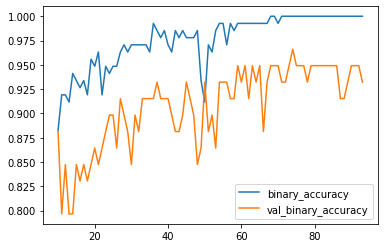

In [ ]:
#The following two sections (validation_loss_and_accuracy and graph_val_loss_and_accuracy)
#were retrieved on February 18, 2023, 
#from https://www.kaggle.com/code/ryanholbrook/binary-classification
#by Ryan Holbrook and Alexis Cook.

#validation_loss_and_accuracy
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot()
history_df.loc[10:, ['binary_accuracy', 'val_binary_accuracy']].plot()

#graph_val_loss_and_accuracy
print(("Best Validation Loss: {:0.4f}" +\
       "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))